In [30]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [24]:
train = pd.read_csv('./Corona_NLP_train.csv', encoding='latin-1')
test = pd.read_csv('./Corona_NLP_test.csv', encoding='latin-1')

Start Data Preprocessing

In [25]:
## get all unique sentiments
train['Sentiment'].unique()
test['Sentiment'].unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [26]:
## sentiment to integer mapping
sentiment_mapping = {'Extremely Negative': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3, 'Extremely Positive': 4}
train['Sentiment'] = train['Sentiment'].map(sentiment_mapping)
test['Sentiment'] = test['Sentiment'].map(sentiment_mapping)

In [27]:
## remove irrelevant information
## remove URLs
def remove_url(original_tweet): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', original_tweet)
## remove @usernames
def remove_username(original_tweet):
    username_pattern = re.compile('@[^\s]+')
    return username_pattern.sub(r'', original_tweet)
## remove hashtags
def remove_hashtag(original_tweet):
    hashtag_pattern = re.compile('#[^\s]+')
    return hashtag_pattern.sub(r'', original_tweet)

def data_cleaning(original_tweet):
    original_tweet = remove_url(original_tweet)
    original_tweet = remove_username(original_tweet)
    original_tweet = remove_hashtag(original_tweet)
    return original_tweet

In [28]:
## apply data cleaning to the original tweets
train['OriginalTweet'] = train['OriginalTweet'].apply(data_cleaning)
test['OriginalTweet'] = test['OriginalTweet'].apply(data_cleaning)

In [29]:
## remove irrelevant columns
train.drop(['ScreenName','TweetAt'], axis=1, inplace=True)
test.drop(['ScreenName','TweetAt'], axis=1, inplace=True)

Data Analysis and Visualization

In [38]:
## concat train and test data
data = pd.concat([train, test], axis=0, ignore_index=True)

In [32]:
neutral   = data[data['Sentiment'] == 2]
positive  = data[data['Sentiment'] >= 3]
negative  = data[data['Sentiment'] <= 2]

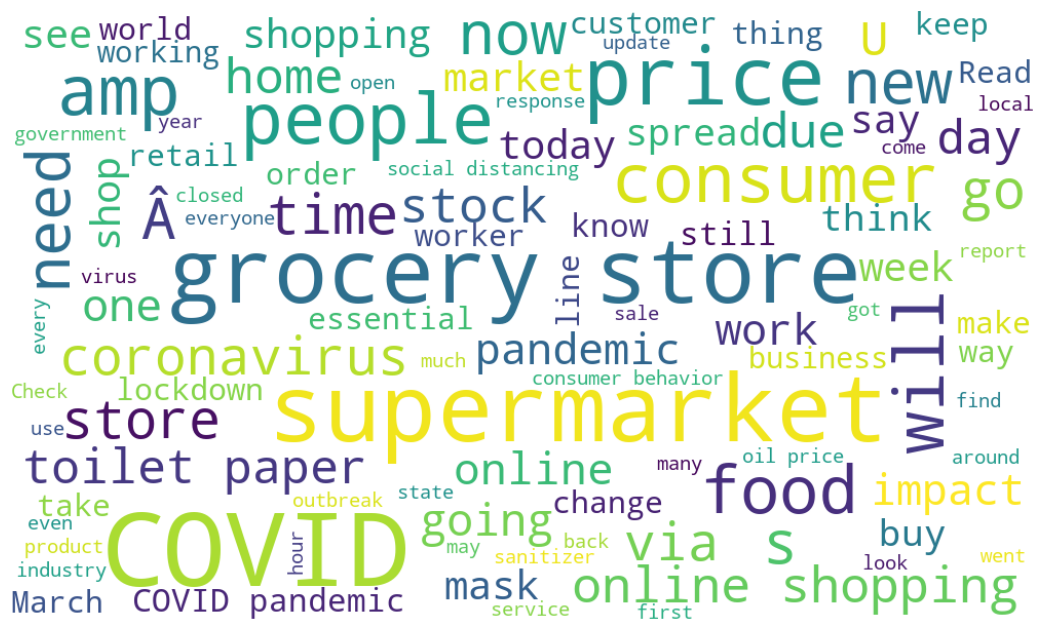

In [35]:
## wordcloud for neutral tweets
txt = ' '.join(rev for rev in neutral.OriginalTweet)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

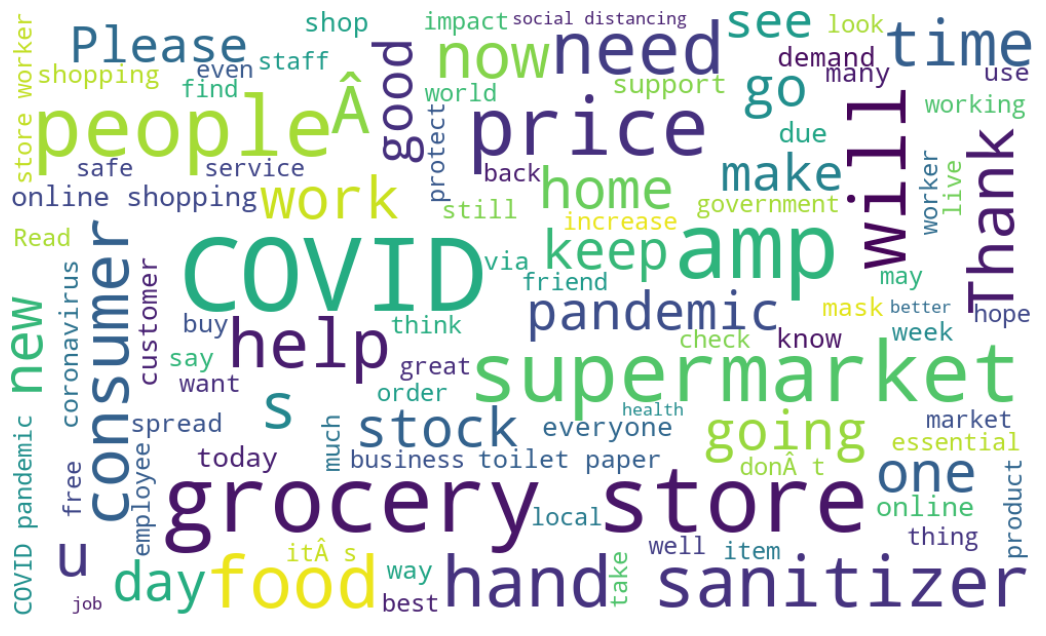

In [34]:
## wordcloud for positive tweets
txt = ' '.join(rev for rev in positive.OriginalTweet)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

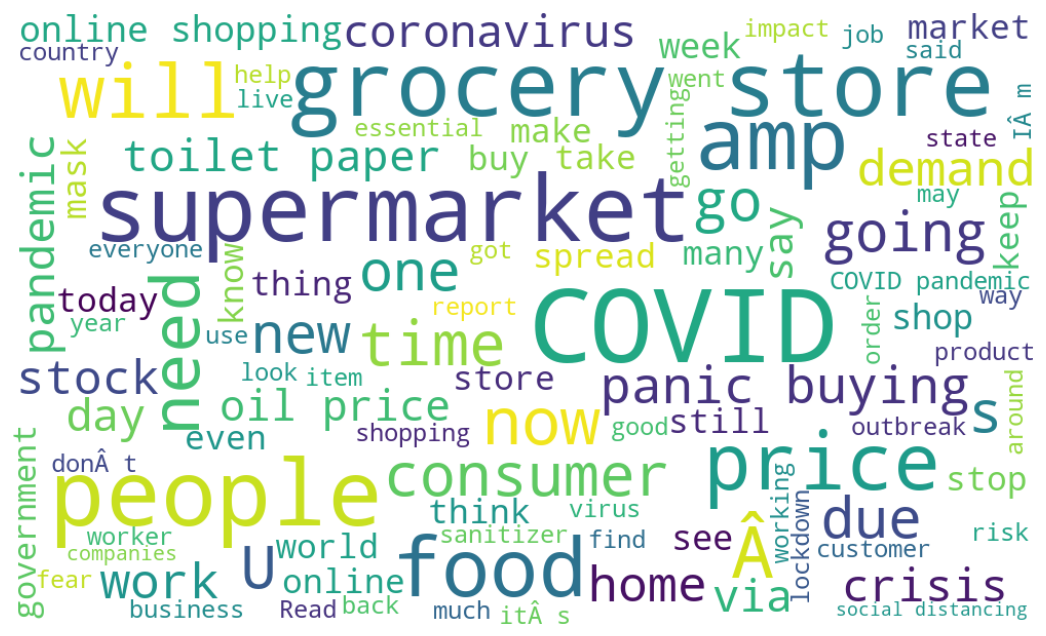

In [36]:
## wordcloud for negative tweets
txt = ' '.join(rev for rev in negative.OriginalTweet)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

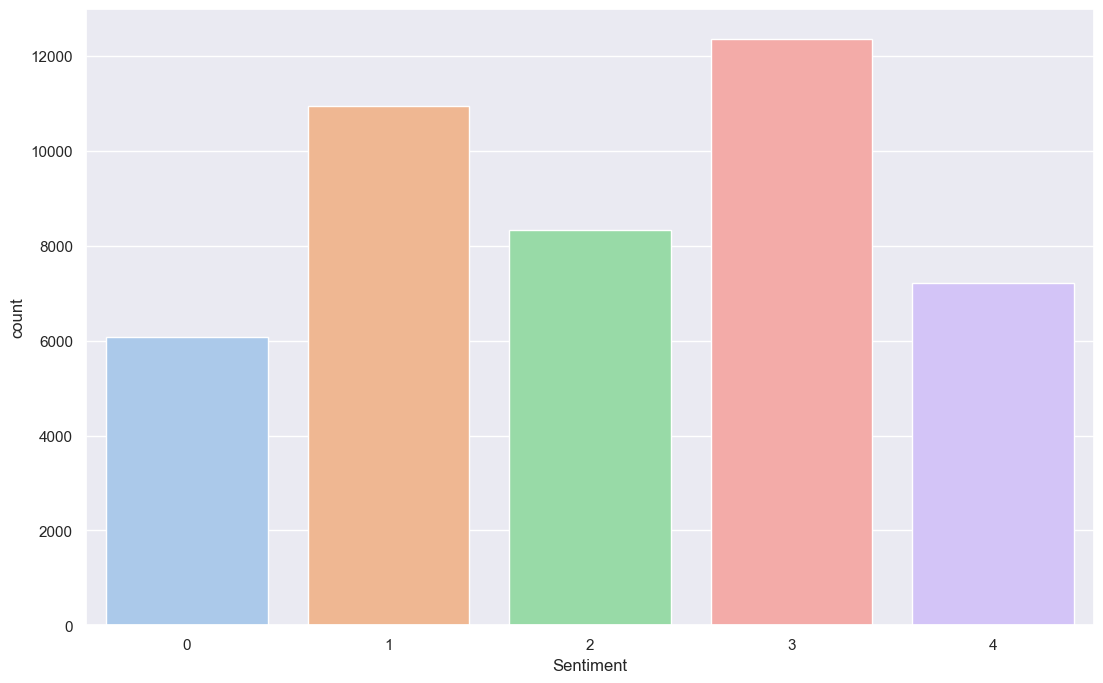

In [39]:
## take a look at sentiment distribution
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='Sentiment',data=data)

<AxesSubplot:xlabel='word_count', ylabel='Count'>

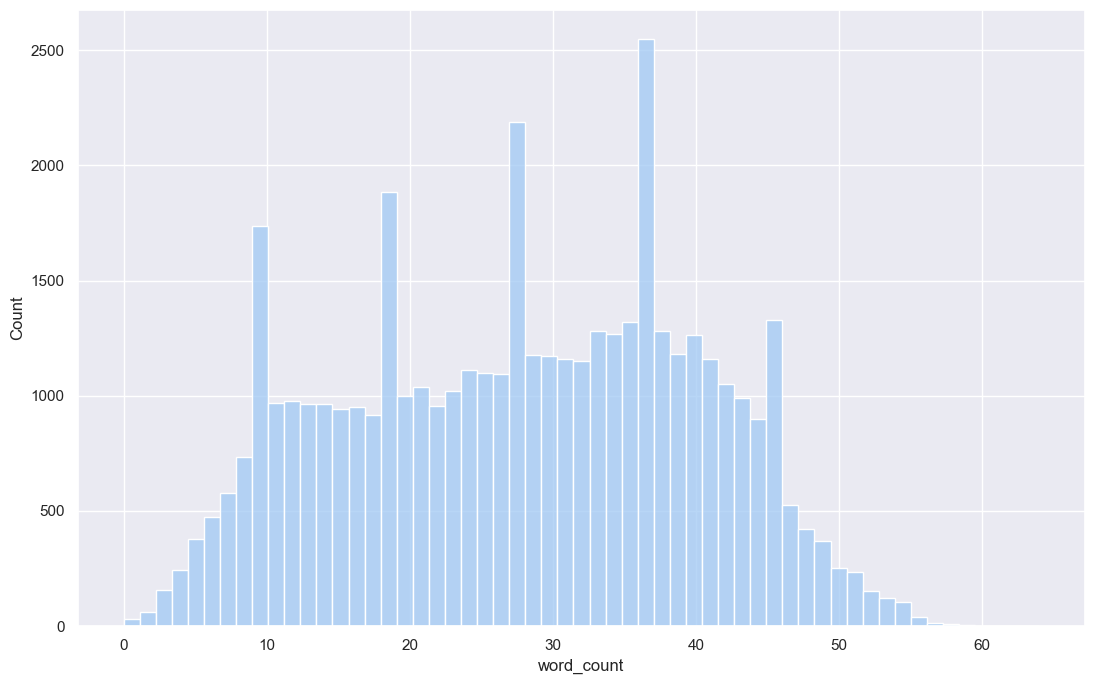

In [41]:
## display number of words of tweet distribution
data['word_count'] = data['OriginalTweet'].apply(lambda x: len(str(x).split()))
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.histplot(x='word_count',data=data)

In [42]:
## distribution of most frequent words
from collections import Counter
data['temp_list'] = data['OriginalTweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,44192
1,to,40960
2,and,25415
3,of,23270
4,a,19640
5,in,19354
6,for,14587
7,is,12828
8,are,11852
9,on,9888


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

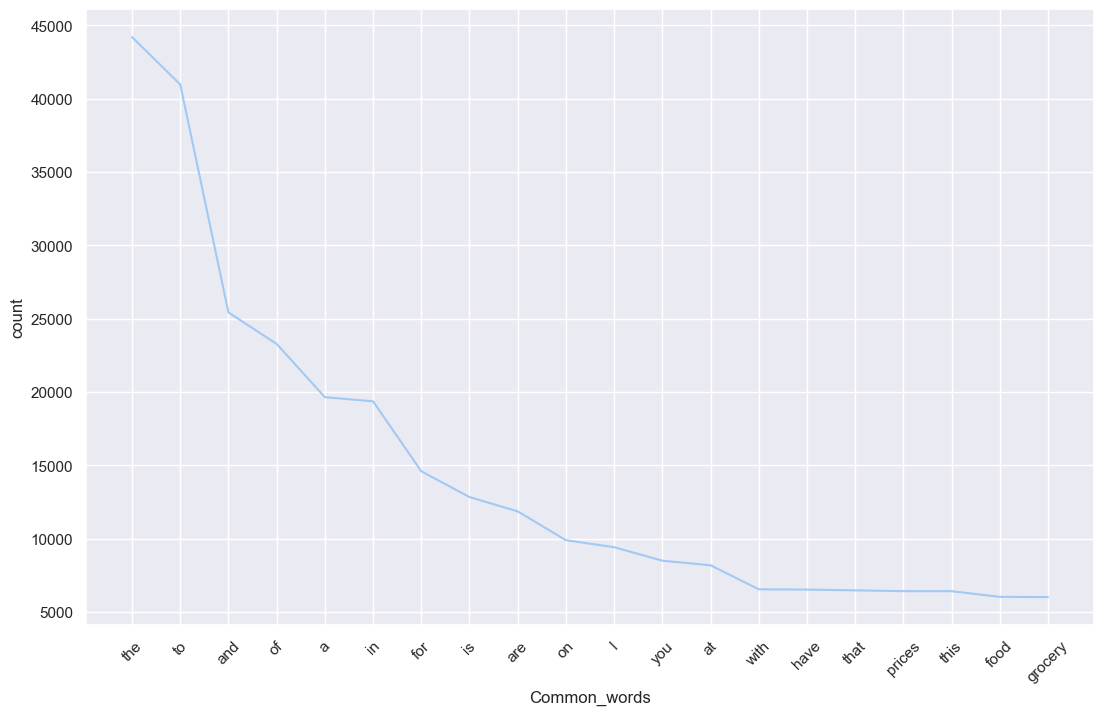

In [43]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.lineplot(x='Common_words',y='count', data=temp)
plt.xticks(rotation=45)